Stage 4 

Search Radius 500 m

Relaxed Design Rules

In [1]:
#Import Tools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import openpyxl
from openpyxl import load_workbook

In [2]:
# Gives adjacency dictionary (not mine)
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# Gives duplicate items in a list (not mine)
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )


#(https://www.geeksforgeeks.org/python-merge-two-lists-into-list-of-tuples/)
def merge(list1, list2):
      
    merged_list = []
    for i in range(max((len(list1), len(list2)))):
  
        while True:
            try:
                tup = (list1[i], list2[i])
            except IndexError:
                if len(list1) > len(list2):
                    list2.append('')
                    tup = (list1[i], list2[i])
                elif len(list1) < len(list2):
                    list1.append('')
                    tup = (list1[i], list2[i])
                continue
  
            merged_list.append(tup)
            break
    return merged_list


# function to check whether the list is empty or not
def is_list_empty(list):
    # checking the length
    if len(list) == 0:
        # returning true as length is 0
        return True
    # returning false as length is greater than 0
    return False

In [3]:
url = "https://raw.githubusercontent.com/erengozdeanil/Foodcycle/main/vacant%20spaces_bigger%20radius3.txt"
resp = requests.get(url)
vacant_spaces = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/Foodcycle/main/available%20waste%204.txt"
resp = requests.get(url)
wastes = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/Foodcycle/main/occupied%20nodes3.txt"
resp = requests.get(url)
occupied_nodes3 = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/Foodcycle/main/occupied%20nodes2.txt"
resp = requests.get(url)
occupied_nodes2 = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/Foodcycle/main/occupied%20nodes.txt"
resp = requests.get(url)
occupied_nodes1 = json.loads(resp.text)

url = "https://raw.githubusercontent.com/erengozdeanil/Foodcycle/main/used%20waste2.txt"
resp = requests.get(url)
used_waste_source = json.loads(resp.text)

In [4]:
#retrieve connections between vacant spaces within radius=x
url1="https://raw.githubusercontent.com/erengozdeanil/Foodcycle/main/Edges_vacant300.txt"
resp1 = requests.get(url1)
edges1 = json.loads(resp1.text)
#converts nested lists into a list of tuples
nearby_space300  = [tuple(i) for i in edges1]

#retrieve connections within radius=x with identifiers
url1="https://raw.githubusercontent.com/erengozdeanil/Foodcycle/main/Edges_try3.txt"
resp1 = requests.get(url1)
edges1 = json.loads(resp1.text)
#converts nested lists into a list of tuples
nearby_waste300 = [tuple(i) for i in edges1]
print(len(nearby_waste300))

4712


In [5]:
occupied={}
for space in occupied_nodes1:
    if occupied_nodes1[space]["system"]!=None:
        occupied[space]={}
        occupied[space]["system"]=occupied_nodes1[space]["system"]
for space in occupied_nodes2:
    if occupied_nodes2[space]["system"]!=None:
        occupied[space]={}
        occupied[space]["system"]=occupied_nodes2[space]["system"]

for space in occupied_nodes3:
    if occupied_nodes3[space]["system"]!=None:
        occupied[space]={}
        occupied[space]["system"]=occupied_nodes3[space]["system"]
print(occupied)    

for occ in occupied:
    if occ in vacant_spaces:
        vacant_spaces.pop(occ)

{'V2': {'system': 'UF4'}, 'V3': {'system': 'UF8'}, 'V5': {'system': 'UF2'}, 'V8': {'system': 'UF4'}, 'V22': {'system': 'UF4'}, 'V24': {'system': 'UF4'}, 'V27': {'system': 'UF4'}, 'V40': {'system': 'UF4'}, 'V44': {'system': 'UF4'}, 'V66': {'system': 'UF3'}, 'V72': {'system': 'UF4'}, 'V131': {'system': 'UF4'}, 'V136': {'system': 'UF4'}, 'V23': {'system': 'UF3'}, 'V21': {'system': 'UF3'}}


In [6]:
#NOTE : SHOULD REMOVE OCCUPIED VACANT SPACES, AND USED WASTE SOURCES FROM THE DICTIONARIES

nearby_waste200=[]
nope=[]
for index,couple in enumerate(nearby_waste300):
    if couple[0] not in occupied:
        print(couple[0])
        nearby_waste200.append(couple)
    else:
        nope.append(couple)

nearby_waste100=[]
for index,couple in enumerate(nearby_waste200):
    if couple[1] in wastes:
        nearby_waste100.append(couple)
    else:
        nope.append(couple)


V0
V0
V0
V0
V0
V0
V0
V0
V0
V0
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V1
V4
V4
V4
V4
V4
V4
V4
V4
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V6
V7
V7
V7
V7
V7
V7
V7
V7
V9
V9
V9
V9
V9
V9
V9
V9
V9
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V10
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V11
V12
V12
V12
V12
V12
V12
V12
V12
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13
V13


In [7]:

nearby_space200=[]
for index,couple in enumerate(nearby_space300):
    if couple[0] not in occupied:
        nearby_space200.append(couple)

nearby_space100=[]
for index,couple in enumerate(nearby_space200):
    if couple[1] in vacant_spaces:
        nearby_space100.append(couple)



In [8]:
for waste in wastes:
    for couple in nearby_waste100:
        if wastes[waste]["type"]=="None":
            if waste in couple:
                print(couple, "removed")
                nearby_waste100.remove(couple)
                print(couple,"removed")

In [9]:
for count in range(len(nearby_waste100)):
    for couple in nearby_waste100:
        if couple[1] in used_waste_source:
            # print(couple)
            nearby_waste100.remove(couple)

for couple in nearby_waste100:
    if couple[1] in used_waste_source:
        print(couple)

In [10]:
workbook = load_workbook(filename="Node_Information_TU.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]
wastes={}
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        if value[4]!=0:
            wastes[value[0]]={}
            wastes[value[0]]["location"]=value[1]
            wastes[value[0]]["source"]=value[2]
            wastes[value[0]]["tag"]=value[5]
            wastes[value[0]]["type"]=value[3]
            wastes[value[0]]["quantity"]=int(value[4])
            wastes[value[0]]["node_type"]="waste"


#assign ranges to quantities
for waste in wastes:
    if wastes[waste]["type"]=="W1":
        if wastes[waste]["quantity"]<= 91852:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>91852) and (wastes[waste]["quantity"]<=459261):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>459261:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W2":
        if wastes[waste]["quantity"]<= 25000:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>25000) and (wastes[waste]["quantity"]<=125000):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>125000:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W3":
        if wastes[waste]["quantity"]<= 5906:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>5906) and (wastes[waste]["quantity"]<=29531):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>29531:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W4":
        if wastes[waste]["quantity"]<= 14100:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>14100) and (wastes[waste]["quantity"]<=70500):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>70500:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W5":
        if wastes[waste]["quantity"]<= 7937:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>7937) and (wastes[waste]["quantity"]<=39684):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>39684:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W6":
        if wastes[waste]["quantity"]<= 187612:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>187612) and (wastes[waste]["quantity"]<=938060):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>938060:
            wastes[waste]["size"]=3
    if wastes[waste]["type"]=="W7":
        if wastes[waste]["quantity"]<= 100000:
            wastes[waste]["size"]=1
        if (wastes[waste]["quantity"]>100000) and (wastes[waste]["quantity"]<=500000):
            wastes[waste]["size"]=2
        if wastes[waste]["quantity"]>500000:
            wastes[waste]["size"]=3
# #remove quantity
for waste in wastes:
    wastes[waste].pop("quantity")

In [11]:
#Dictionary of urban farming systems
    # UF1: Vermiculture, UF2: Aquaculture, UF3: Mushroom, UF4: NFT, UF5: Medai Beds, UF6: Raised Beds, UF7: Water Culture, UF8: Plant Factory, UF9: Aeroponics
    # "S" : supplementary system, "F" : food production system
    # 3 : high, 2 : medium, 1 : low, 0 : none
uf_systems = {
"UF1":{"tag":"UF1","type":"S","weight":3,"solar":1,"in":["W1","W2","W3","W6"],"supplement":None,"out":["S4","S5"]},
"UF2":{"tag":"UF2","type":"SF","weight":3,"solar":2,"in":["W7"],"supplement":["S5"],"out":["O4","S2"]},
"UF3":{"tag":"UF3","type":"F","weight":2,"solar":1,"in":["W2","W3","W4","W6"],"supplement":None,"out":["O3","S4"]},
"UF4":{"tag":"UF4","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF5":{"tag":"UF5","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","O2","W1"]},
"UF6":{"tag":"UF6","type":"F","weight":3,"solar":3,"in":["W6"],"supplement":["S4"],"out":["O1","O2","W1"]},
"UF7":{"tag":"UF7","type":"F","weight":3,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF8":{"tag":"UF8","type":"F","weight":3,"solar":1,"in":["W5","W6"],"supplement":["S2"],"out":["O1","W1","W7"]},
"UF9":{"tag":"UF9","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]}
}

critical_items=["W1","W2","W3", "W4"]
non_critical_items=["W5","W6","W7"]

0. Prepare Data For Decision Making

In [12]:
#Make a dictionary of vacant spaces and potential uf systems
v_potential = {}
for k,v in vacant_spaces.items():
    uf_list=[]
    for j,y in uf_systems.items():
        if (vacant_spaces[k]["structure"])>=(uf_systems[j]["weight"]) and (vacant_spaces[k]["solar"])==(uf_systems[j]["solar"]) and (uf_systems[j]["type"]=="F"):
            v_potential[k]={}
            uf_list.append(uf_systems[j]["tag"])
            v_potential[k]["tag"]=vacant_spaces[k]["tag"]
            v_potential[k]["UF"]=uf_list
# print(v_potential)

# NOTE: Activate to include non transferable rule!
for couple_count in range(len(nearby_waste100)):
    for couple in nearby_waste100:
        if couple[1] in wastes:
            for index,item in enumerate(couple):
                if couple[0] in vacant_spaces:
                    if vacant_spaces[couple[0]]["building"]!=wastes[couple[1]]["source"]:
                        # print(couple,vacant_spaces[couple[0]]["building"],wastes[couple[1]]["source"],wastes[couple[1]]["type"])
                        if (wastes[couple[1]]["type"]=="W5") or (wastes[couple[1]]["type"]=="W6") or (wastes[couple[1]]["type"]=="W7"):
                            if couple in nearby_waste100:
                                # print(couple,wastes[couple[1]]["type"])
                                # print("removed",couple,wastes[couple[1]]["type"],vacant_spaces[couple[0]]["building"],wastes[couple[1]]["source"],wastes[couple[1]]["type"])
                                nearby_waste100.remove(couple)
        else:
            print(couple,"non transferable")
                

print(nearby_waste100)  


[('V0', 'WO74'), ('V0', 'WO75'), ('V0', 'WO78'), ('V1', 'WO54'), ('V1', 'WO84'), ('V1', 'WO66'), ('V1', 'WO11'), ('V1', 'WO12'), ('V1', 'WO10'), ('V1', 'WO72'), ('V1', 'WO34'), ('V1', 'WO9'), ('V1', 'WO36'), ('V1', 'WO73'), ('V1', 'WO33'), ('V1', 'WO28'), ('V1', 'WO30'), ('V4', 'WO75'), ('V4', 'WO74'), ('V4', 'WO78'), ('V6', 'WO2'), ('V6', 'WO1'), ('V6', 'WO4'), ('V6', 'WO3'), ('V6', 'WO28'), ('V6', 'WO12'), ('V6', 'WO10'), ('V6', 'WO9'), ('V6', 'WO11'), ('V6', 'WO33'), ('V6', 'WO30'), ('V6', 'WO36'), ('V6', 'WO34'), ('V7', 'WO74'), ('V7', 'WO75'), ('V7', 'WO78'), ('V9', 'WO78'), ('V9', 'WO75'), ('V9', 'WO74'), ('V10', 'WO72'), ('V10', 'WO73'), ('V10', 'WO66'), ('V10', 'WO54'), ('V10', 'WO84'), ('V11', 'WO66'), ('V11', 'WO72'), ('V11', 'WO73'), ('V11', 'WO75'), ('V11', 'WO78'), ('V11', 'WO84'), ('V11', 'WO54'), ('V12', 'WO74'), ('V12', 'WO75'), ('V12', 'WO78'), ('V13', 'WO34'), ('V13', 'WO36'), ('V13', 'WO12'), ('V13', 'WO11'), ('V13', 'WO33'), ('V13', 'WO10'), ('V13', 'WO28'), ('V13',

{'V0': ['WO74', 'WO75', 'WO78'], 'V1': ['WO54', 'WO84', 'WO66', 'WO11', 'WO12', 'WO10', 'WO72', 'WO34', 'WO9', 'WO36', 'WO73', 'WO33', 'WO28', 'WO30'], 'V4': ['WO75', 'WO74', 'WO78'], 'V6': ['WO2', 'WO1', 'WO4', 'WO3', 'WO28', 'WO12', 'WO10', 'WO9', 'WO11', 'WO33', 'WO30', 'WO36', 'WO34'], 'V7': ['WO74', 'WO75', 'WO78'], 'V9': ['WO78', 'WO75', 'WO74'], 'V10': ['WO72', 'WO73', 'WO66', 'WO54', 'WO84'], 'V11': ['WO66', 'WO72', 'WO73', 'WO75', 'WO78', 'WO84', 'WO54'], 'V12': ['WO74', 'WO75', 'WO78'], 'V13': ['WO34', 'WO36', 'WO12', 'WO11', 'WO33', 'WO10', 'WO28', 'WO9', 'WO30', 'WO84', 'WO54', 'WO66', 'WO2', 'WO3', 'WO1'], 'V14': ['WO9', 'WO10', 'WO11', 'WO12', 'WO54', 'WO36', 'WO34', 'WO33', 'WO84', 'WO28', 'WO2', 'WO66', 'WO72', 'WO73', 'WO1', 'WO30', 'WO3'], 'V15': ['WO84', 'WO66', 'WO54'], 'V16': ['WO75', 'WO78', 'WO74'], 'V17': ['WO72', 'WO73', 'WO66', 'WO54'], 'V18': ['WO72', 'WO73', 'WO66', 'WO54', 'WO84'], 'V19': ['WO66', 'WO72', 'WO73', 'WO84', 'WO75', 'WO54', 'WO78'], 'V20': ['WO

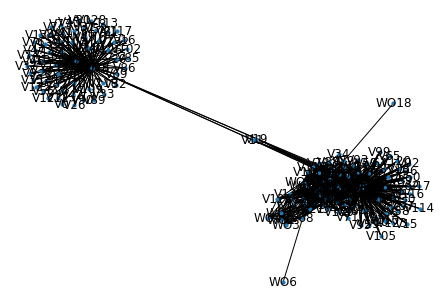

In [13]:
# Draw Graph with nodes and edges with coordinates
G=nx.Graph()
for i,j in vacant_spaces.items():
    G.add_node(i)
G.add_edges_from(nearby_waste100)
nx.draw(G, with_labels=True, node_size=10)

# Create a dictionary with vacant spaces and waste outputs them
new_waste_dict = create_edge_dict(G)
waste_dict = {}
for i,k in new_waste_dict.items():
    if i in vacant_spaces:
        waste_dict[i]=k
        
#List of dictionaries we will use:
# print(v_potential)
print(waste_dict)
# print(uf_systems)

# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict={}
for i,k in v_potential.items():
    v_potential_dict[i]={}
    potential_systems = v_potential[i]["UF"]
    for item in potential_systems:
       v_potential_dict[i][item] = uf_systems[item]["in"]  

In [14]:
print((v_potential))

{'V0': {'tag': 'V0', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V1': {'tag': 'V1', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V6': {'tag': 'V6', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V9': {'tag': 'V9', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V10': {'tag': 'V10', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V11': {'tag': 'V11', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V12': {'tag': 'V12', 'UF': ['UF4', 'UF5', 'UF9']}, 'V14': {'tag': 'V14', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V15': {'tag': 'V15', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V16': {'tag': 'V16', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V17': {'tag': 'V17', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V18': {'tag': 'V18', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V19': {'tag': 'V19', 'UF': ['UF4', 'UF5', 'UF9']}, 'V25': {'tag': 'V25', 'UF': ['UF4', 'UF5', 'UF9']}, 'V26': {'tag': 'V26', 'UF': ['UF4', 'UF5', 'UF9']}, 'V28': {'

Design Rule 3.0 : Sharing Existing Resources
    


Prepare Data

In [15]:
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict={}

for i,k in v_potential_dict.items():
    found_dict[i]={}
    for system,demanded in k.items():
        found_dict[i][system]={}
        found_dict[i][system]["found"]={}
        found_dict[i][system]["source"]={}
        found=[]
        source=[]
        for waste in waste_dict[i]:
            for each in demanded: 
                if waste in wastes:
                    available = wastes[waste]["type"]
                    source2 = wastes[waste]["tag"]
                    print(i,wastes[waste])
                    source_size = wastes[waste]["size"]
                    if each == available:
                        found.append(available)
                        source.append(source2)
                        found_dict[i][system]["found"]=found
                        found_dict[i][system]["source"]=source


V0 {'location': '{2065.234004, 423.253128, 0}', 'source': 'AS2', 'tag': 'WO74', 'type': 'W4', 'node_type': 'waste', 'size': 1}
V0 {'location': '{2065.234004, 423.253128, 0}', 'source': 'AS2', 'tag': 'WO74', 'type': 'W4', 'node_type': 'waste', 'size': 1}
V0 {'location': '{2065.234004, 423.253128, 0}', 'source': 'AS2', 'tag': 'WO74', 'type': 'W4', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 341.032952, 0}', 'source': 'fellowship', 'tag': 'WO75', 'type': 'W1', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 341.032952, 0}', 'source': 'fellowship', 'tag': 'WO75', 'type': 'W1', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 341.032952, 0}', 'source': 'fellowship', 'tag': 'WO75', 'type': 'W1', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 286.499162, 0}', 'source': 'AE', 'tag': 'WO78', 'type': 'W4', 'node_type': 'waste', 'size': 1}
V0 {'location': '{1918.412262, 286.499162, 0}', 'source': 'AE', 'tag': 'WO78', 'type': 'W4'

In [16]:
#Make a dictionary of missing for each potential uf system           
for i,system in found_dict.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict.items():
    for system in k:
        for item in (found_dict[i][system]["found"]):
            if item in found_dict[i][system]["missing"]:
                missing_list=found_dict[i][system]["missing"]
                missing_list.remove(item)

#reach sizes of duplicate items
for i,k in found_dict.items():
    for system in k:
        found_items=found_dict[i][system]["found"]


In [17]:
#add circularity percentage to found_dict
for space in found_dict:
    for system in found_dict[space]:
        found_dict[space][system]["circularity"]=[]
        found=len(found_dict[space][system]["found"])
        missing=len(found_dict[space][system]["missing"])
        total=found+missing
        found_dict[space][system]["circularity"]=found/total
        # print(space)
# print(found_dict)   

#make a duplicate of found dict, sort system based on circularities
sorted_dict={}
for space in found_dict:
    system=sorted(found_dict[space], key=lambda x: (found_dict[space][x]['circularity']), reverse=True)  
    sorted_dict[space]={} 
    for item in system:
        values={}
        values=(found_dict[space][item])
        sorted_dict[space][item]=values


In [18]:
print(len(found_dict))

109


In [19]:

print(len(sorted_dict))

109


Assign Food Production System To Vacant Space

In [20]:
# Assign a food production system 
# Rule 1: If there are found item(s)
# Rule 2: If none of the missing items are critical
new_edges=[]
occupied_dict={}
for space in sorted_dict:
    occupied_dict[space]={}
    occupied_dict[space]["system"]={}
    occupied_dict[space]["found"]={}
    occupied_dict[space]["source"]={}
    occupied_dict[space]["missing"]={}
    for system in sorted_dict[space]:
        if len(sorted_dict[space][system]["found"])!=0: 
            for missing in sorted_dict[space][system]["missing"]:
                if missing in non_critical_items:
                    occupied_dict[space]["system"]=system  
                    occupied_dict[space]["found"]=(sorted_dict[space][system]["found"])
                    occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                    occupied_dict[space]["source"]=sorted_dict[space][system]["source"]
                    occupied_dict[space]["circularity"]=sorted_dict[space][system]["circularity"]
                    for items in sorted_dict[space][system]["found"]:
                        used_waste_source.append(source)
                        edge_tuple=(source,space)
                        new_edges.append(edge_tuple)
            if len(occupied_dict[space]["system"])!=0:
                break


In [21]:
# Assign a food production system even if there are not any found items
# Rule 3: If there is one missing item that is not critical
# Rule 4: If there are two missing items that are not critical
for space in sorted_dict:
    for system in sorted_dict[space]:
        if len(occupied_dict[space]["system"])==0:
            if len(sorted_dict[space][system]["found"])==0: 
                if len(sorted_dict[space][system]["missing"])==1:
                    for missing in sorted_dict[space][system]["missing"]:
                        if missing in non_critical_items:
                            print(space)
                            occupied_dict[space]["system"]=system  
                            occupied_dict[space]["found"]=None
                            occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                            occupied_dict[space]["source"]="supply externally"
                    if len(occupied_dict[space]["system"])!=0:
                        break

                if len(sorted_dict[space][system]["missing"])==2:
                    for missing in sorted_dict[space][system]["missing"]:
                        if missing in non_critical_items:
                            print(space)
                            occupied_dict[space]["system"]=system  
                            occupied_dict[space]["found"]=None
                            occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                            occupied_dict[space]["source"]="supply externally"
                    if len(occupied_dict[space]["system"])!=0:
                        break

V0
V1
V4
V6
V9
V10
V11
V14
V15
V16
V17
V18
V28
V30
V31
V32
V33
V35
V42
V43
V46
V48
V49
V53
V65
V67
V73
V76
V80
V81
V82
V84
V89
V100
V107
V109
V116
V120
V124
V126
V130
V132
V134
V137
V139
V140
V141
V142
V145


Create New List To Be Used In Next Steps

In [22]:
# Add circularity & outputs to occupied_dict
for space in occupied_dict:
    occupied_dict[space]["circularity"]={}
    occupied_dict[space]["outputs"]={}
    occupied_dict[space]["supplements"]={}
    if len(occupied_dict[space]["system"])!=0:
        system=occupied_dict[space]["system"]
        outputs=(uf_systems[system]["out"])
        supplements=uf_systems[system]["supplement"]
        occupied_dict[space]["supplements"]=supplements
        occupied_dict[space]["outputs"]=outputs
        occupied_dict[space]["circularity"]=sorted_dict[space][system]["circularity"]

# Remove empty spaces from occupied_dict
remove=[]
for space in occupied_dict:
    if len(occupied_dict[space]["system"])==0:
        remove.append(space)
for items in remove:
    occupied_dict.pop(items)

# Remove occupied spaces from found_dict list
remove2=[]
for space in sorted_dict:
    if space in occupied_dict:
        remove2.append(space)
print(len(remove))
for items in remove2:
    sorted_dict.pop(items)

50


Assign Food Producing Supplementary Systems

In [23]:
# Look for a system that can supply needed supplement ("S2" Nutrient Dense Water)
# Put the findings in a dictionary
v_supplement_fs={}
for space in occupied_dict:
    v_supplement_fs[space]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["fs_system"]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["supplement source"]={}
    v_supplement_fs[space]["fs_demand"]={}
    v_supplement_fs[space]["fs_demand source"]={}
    v_supplement_fs[space]["potential source"]={}
    supplement=occupied_dict[space]["supplements"]
    if supplement!= None:
        for item in supplement:
            if item=="S2": 
                for i in uf_systems:
                    out=uf_systems[i]["out"]
                    if "S2" in out:
                        v_supplement_fs[space]["fs_system"]=i
                        v_supplement_fs[space]["supplement"]=item
                        v_supplement_fs[space]["fs_demand"]=uf_systems[i]["in"]
    else:
        v_supplement_fs[space]["fs_system"]=None


In [24]:
# We created a dictionary for spaces which need supplement to store system, supplementing neighbor and supplement type for each space found what kind of system and supplement and input is necessary 
# Check the neighbors of supplement needing space to see if there is a potential neighbor
# Rule 5: (supplement needing space's size) == (its neighbors size)
# Rule 6: (neighbor's solar exposure) == (needed system's solar exposure)
# Rule 7: (neighbor's structural capacity) >= (needed system's weight)
for space in v_supplement_fs:
    potential=[]
    if space in vacant_spaces:
        
        for space2,neighbor in nearby_space100:
            if neighbor in vacant_spaces:
                if space==space2:
                    if (v_supplement_fs[space]["supplement source"]==None) and (len(v_supplement_fs[space]["fs_system"])!=0):
                        # print(neighbor,"is available")
                        system=v_supplement_fs[space]["fs_system"]
                        print(system,"system")
                        print(vacant_spaces[space]["size"],vacant_spaces[neighbor]["size"])
                        if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                            potential.append(neighbor)
                            # print(space,potential)
                            v_supplement_fs[space]["potential source"]=potential
                elif space==neighbor:
                        print(neighbor,space2,"reverse is available")
                        if (v_supplement_fs[space]["supplement source"]==None) and (len(v_supplement_fs[space]["fs_system"])!=0):
                            print(space2,"is available")
                            system=v_supplement_fs[space]["fs_system"]
                            if (vacant_spaces[space]["size"]==vacant_spaces[space2]["size"]) and (vacant_spaces[space2]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[space2]["solar"]>=uf_systems[system]["solar"]):
                                potential.append(space2)
                                print(potential)
                                print(space,potential)
                                print(space,"matches",space2,"and",system)
                                v_supplement_fs[space]["potential source"]=potential
                            else:
                                print("structure",space,vacant_spaces[space2]["structure"],system,uf_systems[system]["weight"])
                                print("sun",space,vacant_spaces[space2]["solar"],system,uf_systems[system]["solar"])
                        else:
                            print(space,space2,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")

V0 V4 reverse is available
V0 V4 not available {} no need for supplement
V0 V7 reverse is available
V0 V7 not available {} no need for supplement
V0 V9 reverse is available
V0 V9 not available {} no need for supplement
V0 V12 reverse is available
V0 V12 not available {} no need for supplement
V0 V16 reverse is available
V0 V16 not available {} no need for supplement
V0 V20 reverse is available
V0 V20 not available {} no need for supplement
V0 V26 reverse is available
V0 V26 not available {} no need for supplement
V0 V31 reverse is available
V0 V31 not available {} no need for supplement
V0 V32 reverse is available
V0 V32 not available {} no need for supplement
V0 V33 reverse is available
V0 V33 not available {} no need for supplement
V0 V35 reverse is available
V0 V35 not available {} no need for supplement
V0 V36 reverse is available
V0 V36 not available {} no need for supplement
V0 V37 reverse is available
V0 V37 not available {} no need for supplement
V0 V41 reverse is available
V0 

In [25]:
# Check if potential sources have necessary waste sources nearby
# Rule 8: For food producing supplementary systems all the items should be found
# Rule 9: If all the items cannot be found supply externally
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        for vacant in potential:
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        if v_supplement_fs[space]["fs_demand"]==wastes[nearby]["type"]:
                            v_supplement_fs[space]["supplement source"]=vacant
                            v_supplement_fs[space]["fs_demand source"]=nearby
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:      
                                break
                        elif v_supplement_fs[space]["fs_demand"]!=wastes[nearby]["type"]:
                            v_supplement_fs[space]["supplement source"]=vacant
                            v_supplement_fs[space]["fs_demand source"]="supply externally"
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:      
                                break
            if len(v_supplement_fs[space]["supplement source"])>0:
                            break
# Add newly assigned food-producing supplementary systems to the "occupied nodes" list
for space in v_supplement_fs:
    if (v_supplement_fs[space]["fs_system"])!=None:
        if ((v_supplement_fs[space]["supplement source"])!=None) and (len(v_supplement_fs[space]["supplement source"])!=0)and (v_supplement_fs[space]["fs_demand source"]!="supply externally"):
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[occ]["circularity"]=1
        elif v_supplement_fs[space]["fs_demand source"]=="supply externally":
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=None
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[occ]["circularity"]=0


Assigning Supplementary Systems

In [26]:
for space in v_supplement_fs:
    if (v_supplement_fs[space]["supplement source"])!={}:
        if (v_supplement_fs[space]["fs_system"])!={}:
        
            if len(v_supplement_fs[space]["supplement source"])!=0:
                occ=v_supplement_fs[space]["supplement source"]
                occupied_dict[occ]={}
                print(occupied_dict)
                occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
                occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
                occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
                occupied_dict[occ]["circularity"]=1

# Now we have food supplying supplementary systems
# We still need to check if these systems need supplements ("S4" fish food or "S5" fertiliser)
for space in occupied_dict: 
    system=occupied_dict[space]["system"]
    value=uf_systems[system]["supplement"]
    if value!=None:
        for supplement in value:
            if (supplement=="S5") or (supplement=="S4"):
                v_supplement_fs[space]={}
                v_supplement_fs[space]["supplement"]=supplement
                for uf in uf_systems:
                    for out in uf_systems[uf]["out"]:
                        if supplement == out:
                            v_supplement_fs[space]["fs_system"]=uf
                            v_supplement_fs[space]["fs_demand"]=uf_systems[uf]["in"]
                    if len(v_supplement_fs[space]["fs_system"])>0:
                        break
                v_supplement_fs[space]["supplement source"]={}
                v_supplement_fs[space]["fs_demand source"]={}
                v_supplement_fs[space]["potential source"]={}

In [27]:
# Make a potential list of vacant spaces around the supplement needing space
# Rule 12: (supplement needing space's size) == (its neighbors size)
# Rule 13: (neighbor's solar exposure) == (needed system's solar exposure)
# Rule 14: (neighbor's structural capacity) >= (needed system's weight)
for space in v_supplement_fs:
    potential=[]
    if space in vacant_spaces:
        if neighbor in vacant_spaces:
            for space2,neighbor in nearby_space100:  
                if space2 in vacant_spaces:
                    if (space==space2):
                        print(space2,neighbor)
                        if (len(v_supplement_fs[space]["supplement source"])==0) and (v_supplement_fs[space]["fs_system"]!=None):
                            system=v_supplement_fs[space]["fs_system"]
                            if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                                potential.append(neighbor)
                                v_supplement_fs[space]["potential source"]=potential
                            else:
                                print(space,vacant_spaces[neighbor]["structure"],system,uf_systems[system]["weight"])
                        else:
                            print(space,neighbor,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
                    elif space==neighbor:
                        print(neighbor,space2,"reverse is available")
                        if (v_supplement_fs[space]["supplement source"]=={}) and ((v_supplement_fs[space]["fs_system"])!=None):
                            system=v_supplement_fs[space]["fs_system"]
                            if (vacant_spaces[space]["size"]==vacant_spaces[space2]["size"]) and (vacant_spaces[space2]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[space2]["solar"]>=uf_systems[system]["solar"]):
                                potential.append(space2)
                                v_supplement_fs[space]["potential source"]=potential
                            else:
                                print("structure",space,vacant_spaces[space2]["structure"],system,uf_systems[system]["weight"])
                                print("sun",space,vacant_spaces[space2]["solar"],system,uf_systems[system]["solar"])
                                print("size",vacant_spaces[space]["size"]==vacant_spaces[space2]["size"])
                        else:
                            print(space,space2,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")

V0 V118
V0 1 UF1 3
V0 V117
V0 1 UF1 3
V0 V52
V0 1 UF1 3
V0 V108
V0 1 UF1 3
V0 V142
V0 3 UF1 3
V0 V128
V0 1 UF1 3
V0 V134
V0 3 UF1 3
V0 V35
V0 V125
V0 1 UF1 3
V0 V49
V0 V41
V0 V115
V0 1 UF1 3
V0 V90
V0 3 UF1 3
V0 V32
V0 V109
V0 3 UF1 3
V0 V113
V0 1 UF1 3
V0 V77
V0 3 UF1 3
V0 V103
V0 1 UF1 3
V0 V56
V0 3 UF1 3
V0 V43
V0 V135
V0 1 UF1 3
V0 V47
V0 1 UF1 3
V0 V132
V0 3 UF1 3
V0 V127
V0 1 UF1 3
V0 V141
V0 3 UF1 3
V0 V37
V0 V31
V0 V74
V0 1 UF1 3
V0 V144
V0 1 UF1 3
V0 V85
V0 1 UF1 3
V0 V84
V0 3 UF1 3
V0 V133
V0 1 UF1 3
V0 V86
V0 3 UF1 3
V0 V42
V0 V9
V0 V126
V0 3 UF1 3
V0 V140
V0 3 UF1 3
V0 V36
V0 1 UF1 3
V0 V76
V0 3 UF1 3
V0 V7
V0 V89
V0 3 UF1 3
V0 V81
V0 3 UF1 3
V0 V82
V0 3 UF1 3
V0 V69
V0 1 UF1 3
V0 V12
V0 1 UF1 3
V0 V20
V0 V45
V0 V80
V0 3 UF1 3
V0 V16
V0 V107
V0 3 UF1 3
V0 V102
V0 1 UF1 3
V0 V46
V0 V33
V0 V70
V0 3 UF1 3
V0 V48
V0 V4
V0 V26
V0 1 UF1 3
V0 V4 reverse is available
V0 V7 reverse is available
V0 V9 reverse is available
V0 V12 reverse is available
structure V0 1 UF1 3
sun V0 3 UF1 

In [28]:
# Check if potential sources have necessary waste sources around
# Rule 15: For supplementary systems all the items should be found
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        for vacant in potential:
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        if v_supplement_fs[space]["fs_demand"]==wastes[nearby]["type"]:
                            v_supplement_fs[space]["supplement source"]=vacant
                            v_supplement_fs[space]["fs_demand source"]=nearby
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:      
                                break
                        elif v_supplement_fs[space]["fs_demand"]!=wastes[nearby]["type"]:
                            v_supplement_fs[space]["supplement source"]=vacant
                            v_supplement_fs[space]["fs_demand source"]="supply externally"
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:       
                                break
            if len(v_supplement_fs[space]["supplement source"])>0:     
                            break

In [29]:
# Add newly assigned supplementary systems to the "occupied nodes" list
for space in v_supplement_fs:
    if (v_supplement_fs[space]["fs_system"])!=None:
        if len(v_supplement_fs[space]["supplement source"])!=0:
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=v_supplement_fs[space]["fs_system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["outputs"]=v_supplement_fs[space]["supplement"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[occ]["circularity"]=1
        elif v_supplement_fs[space]["fs_demand source"]=="supply externally":
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=None
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[occ]["outputs"]=v_supplement_fs[space]["supplement"]
            occupied_dict[occ]["circularity"]=0


In [30]:
for space in sorted_dict:
    for system in sorted_dict[space]:
        if space not in occupied_dict:
            if len(sorted_dict[space][system]["found"])==0: 
                # if len(sorted_dict[space][system]["missing"])==3:
                    for missing in sorted_dict[space][system]["missing"]:
                        if missing in non_critical_items:
                            print(space)
                            occupied_dict[space]={}
                            occupied_dict[space]["system"]=system  
                            occupied_dict[space]["found"]=None
                            occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                            occupied_dict[space]["source"]="supply externally"
                            occupied_dict[space]["circularity"]=0
                    if len(occupied_dict[space]["system"])!=0:
                        break

V12
V12
V12
V19
V19
V19
V25
V25
V25
V26
V26
V26
V36
V36
V36
V38
V38
V38
V39
V39
V39
V47
V47
V47
V51
V51
V51
V52
V52
V52
V54
V54
V54
V57
V57
V57
V58
V58
V58
V59
V59
V59
V60
V60
V60
V61
V61
V61
V62
V62
V62
V63
V63
V63
V64
V64
V64
V69
V69
V69
V71
V71
V71
V74
V74
V74
V75
V75
V75
V78
V78
V78
V85
V85
V85
V87
V87
V87
V88
V88
V88
V91
V91
V91
V92
V92
V92
V94
V94
V94
V97
V97
V97
V102
V102
V102
V103
V103
V103
V106
V106
V106
V108
V108
V108
V110
V110
V110
V113
V113
V113
V115
V115
V115
V117
V117
V117
V118
V118
V118
V121
V121
V121
V122
V122
V122
V125
V125
V125
V127
V127
V127
V128
V128
V128
V129
V129
V129
V133
V133
V133
V135
V135
V135
V138
V138
V138
V144
V144
V144


In [31]:
# Make a dictionary of source: waste type: size: receiver:tuple
new_edges1=[]
for couple in new_edges:
    if (couple[0]!=[]) and (couple[1]!=[]) :
        new_edges1.append(couple)

network_dict={}
for source,space in new_edges1:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges1:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["outputs"]
    

for space in occupied_dict:
    if occupied_dict[space]["system"]==None:
        occupied_dict.remove(space)

In [32]:
vacant_spaces2=vacant_spaces.copy()

for space in occupied_dict:
    vacant_spaces2.pop(space)


In [33]:

file = "vacant spaces_bigger radius4.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(vacant_spaces2, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")


vacant spaces_bigger radius4.txt has been updated successfully


In [34]:
file = "available waste 5.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(wastes2, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "used waste4.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(used_waste_source, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

Problem with updating file
used waste4.txt has been updated successfully


In [35]:
# #retrieve data regarding vacant spaces
from openpyxl import load_workbook
workbook = load_workbook(filename="Node_Information_TU.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

# #create dictionary based on excel worksheet
vacant_spaces={}
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        vacant_spaces[value[0]]={}
        vacant_spaces[value[0]]["location"]=value[1]
        vacant_spaces[value[0]]["tag"]=value[6]
        vacant_spaces[value[0]]["building"]=value[3]
        vacant_spaces[value[0]]["size_real"]=int(value[2])
        vacant_spaces[value[0]]["loc_building"]=value[4]
        vacant_spaces[value[0]]["orientation"]=value[5]
        vacant_spaces[value[0]]["node_type"]="vacant"

for space in vacant_spaces:
    if vacant_spaces[space]["loc_building"]=="roof":
        vacant_spaces[space]["structure"]=1
        vacant_spaces[space]["solar"]=3
    if vacant_spaces[space]["loc_building"]=="basement":
        vacant_spaces[space]["structure"]=3
        vacant_spaces[space]["solar"]=1
    if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
        vacant_spaces[space]["solar"]=3
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
        vacant_spaces[space]["solar"]=1
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
        vacant_spaces[space]["solar"]=2
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
        vacant_spaces[space]["solar"]=3
        vacant_spaces[space]["structure"]=2
    if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
        vacant_spaces[space]["solar"]=1
        vacant_spaces[space]["structure"]=2
    if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
        vacant_spaces[space]["solar"]=2
        vacant_spaces[space]["structure"]=2
    if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
        vacant_spaces[space]["solar"]=3
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
        vacant_spaces[space]["solar"]=1
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
        vacant_spaces[space]["solar"]=2
        vacant_spaces[space]["structure"]=3

#interpret size based on predefined ranges
for space in vacant_spaces:
    if vacant_spaces[space]["size_real"]<=100:
        vacant_spaces[space]["size"]=1
    if (vacant_spaces[space]["size_real"]>100) and (vacant_spaces[space]["size_real"]<=500) :
        vacant_spaces[space]["size"]=2
    if (vacant_spaces[space]["size_real"]>500):
        vacant_spaces[space]["size"]=3
    
#remove orientation,loc_building,size_real
for space in vacant_spaces:
    vacant_spaces[space].pop("orientation")
    vacant_spaces[space].pop("size_real")
    vacant_spaces[space].pop("loc_building")  

In [36]:
workbook = load_workbook(filename="Node_Information_TU.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]
wastes2={}
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        wastes2[value[0]]={}
        wastes2[value[0]]["location"]=value[1]
        wastes2[value[0]]["source"]=value[2]
        wastes2[value[0]]["type"]=value[3]
        wastes2[value[0]]["quantity"]=value[4]
        wastes2[value[0]]["tag"]=value[5]
        wastes2[value[0]]["node_type"]="waste"

In [37]:
#combine wastes and vacant_spaces
workbook = load_workbook(filename="coordintes_xyz.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

new_edges2=[]
for space in network_dict:
    sources=(network_dict[space]["receiver"])
    tuples=(space,sources)
    new_edges2.append(tuples)

In [38]:
#update locations in dictionary based on excel worksheet
# #create dictionary based on excel worksheet
workbook = load_workbook(filename="Node_Information_TU.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

vacant_spaces1={}
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        vacant_spaces1[value[0]]={}
        vacant_spaces1[value[0]]["location"]=value[1]
        vacant_spaces1[value[0]]["tag"]=value[6]

workbook = load_workbook(filename="coordintes_xyz.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

coordinate_list1=[]
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
            print(coordinate)
    coordinate_list1.append(coordinate)

for index1,space in enumerate(vacant_spaces1):
    for index2,coordinate in enumerate(coordinate_list1):
        if index1==index2:
            vacant_spaces1[space]["location"]=coordinate_list1[index2]
            

(2020.580643, 387.391529, 0)
(2020.580643, 387.391529, 0)
(2020.580643, 387.391529, 0)
(935.001269, 534.594454, 0)
(935.001269, 534.594454, 0)
(935.001269, 534.594454, 0)
(766.997201, 400.341737, 0)
(766.997201, 400.341737, 0)
(766.997201, 400.341737, 0)
(254.491041, 556.132177, 0)
(254.491041, 556.132177, 0)
(254.491041, 556.132177, 0)
(1770.13761, 751.608275, 0)
(1770.13761, 751.608275, 0)
(1770.13761, 751.608275, 0)
(1189.499865, 487.345394, 0)
(1189.499865, 487.345394, 0)
(1189.499865, 487.345394, 0)
(336.903473, 621.882305, 0)
(336.903473, 621.882305, 0)
(336.903473, 621.882305, 0)
(2237.009725, 595.715597, 0)
(2237.009725, 595.715597, 0)
(2237.009725, 595.715597, 0)
(826.49752, 584.987928, 0)
(826.49752, 584.987928, 0)
(826.49752, 584.987928, 0)
(1886.407729, 148.985643, 0)
(1886.407729, 148.985643, 0)
(1886.407729, 148.985643, 0)
(1238.274556, 660.86452, 0)
(1238.274556, 660.86452, 0)
(1238.274556, 660.86452, 0)
(1491.382251, 454.896508, 0)
(1491.382251, 454.896508, 0)
(1491.382

In [39]:
#update locations in dictionary based on excel worksheet

workbook = load_workbook(filename="coordintes_xyz.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

coordinate_list2=[]
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
    coordinate_list2.append(coordinate)

for index1,space in enumerate(wastes2):
    for index2,coordinate in enumerate(coordinate_list2): 
        if index1==index2:
            # print(index2,coordinate,space)
            wastes2[space]["location"]=coordinate_list2[index2]
combined_dict=vacant_spaces1.copy()
combined_dict.update(wastes2)

print(vacant_spaces1["V13"])
coordinates=[]
#make a coordinate list for new_edges [(coordinates1,coordinates2),(coordinates1,coordinates2),(coordinates1,coordinates2)]
for item in new_edges2:
        coordinate_tuple=(combined_dict[item[0]]["location"],combined_dict[item[1]]["location"])
        print(item,coordinate_tuple)
        coordinates.append(coordinate_tuple)
print(coordinate_tuple)

{'location': (725.481226, 475.783652, 0), 'tag': 'V13'}
('WO66', 'V53') ((1133.545179, 568.816397, 0), (992.176817, 659.846045, 0))
('V53', 'V1') ((992.176817, 659.846045, 0), (935.001269, 534.594454, 0))
('WO34', 'V28') ((681.753705, 357.81258, 0), (575.482159, 536.19563, 0))
('V28', 'V6') ((575.482159, 536.19563, 0), (336.903473, 621.882305, 0))
('WO9', 'V1') ((686.787594, 718.574574, 0), (935.001269, 534.594454, 0))
('V1', 'V10') ((935.001269, 534.594454, 0), (1238.274556, 660.86452, 0))
('WO3', 'V6') ((284.076531, 481.981824, 0), (336.903473, 621.882305, 0))
('V6', 'V14') ((336.903473, 621.882305, 0), (707.801875, 734.33, 0))
('WO11', 'V73') ((708.181619, 620.833243, 0), (1144.065167, 767.895521, 0))
('V73', 'V65') ((1144.065167, 767.895521, 0), (1365.642899, 548.590606, 0))
('WO4', 'V100') ((190.949597, 634.676436, 0), (291.760006, 614.43794, 0))
('V100', 'V68') ((291.760006, 614.43794, 0), (257.114541, 548.516607, 0))
('WO84', 'V123') ((1008.117463, 432.481923, 0), (1154.60924, 2

In [40]:
print(len(occupied_dict))
print(len(network_dict))
export_edges_dict={}
for index,couple in enumerate(coordinates):
        export_edges_dict[index]={}
        export_edges_dict[index]["coordinate"]=couple

export_edges_dict={}
for index,waste in enumerate(network_dict):
        export_edges_dict[index]={}
        export_edges_dict[index]["type"]=network_dict[waste]["type"]
        export_edges_dict[index]["connection"]=coordinates[index]

print(export_edges_dict)

110
24
{0: {'type': 'W3', 'connection': ((1133.545179, 568.816397, 0), (992.176817, 659.846045, 0))}, 1: {'type': 'S4', 'connection': ((992.176817, 659.846045, 0), (935.001269, 534.594454, 0))}, 2: {'type': 'W3', 'connection': ((681.753705, 357.81258, 0), (575.482159, 536.19563, 0))}, 3: {'type': 'S4', 'connection': ((575.482159, 536.19563, 0), (336.903473, 621.882305, 0))}, 4: {'type': 'W3', 'connection': ((686.787594, 718.574574, 0), (935.001269, 534.594454, 0))}, 5: {'type': 'S4', 'connection': ((935.001269, 534.594454, 0), (1238.274556, 660.86452, 0))}, 6: {'type': 'W3', 'connection': ((284.076531, 481.981824, 0), (336.903473, 621.882305, 0))}, 7: {'type': 'S4', 'connection': ((336.903473, 621.882305, 0), (707.801875, 734.33, 0))}, 8: {'type': 'W4', 'connection': ((708.181619, 620.833243, 0), (1144.065167, 767.895521, 0))}, 9: {'type': 'S4', 'connection': ((1144.065167, 767.895521, 0), (1365.642899, 548.590606, 0))}, 10: {'type': 'W4', 'connection': ((190.949597, 634.676436, 0), (2

In [41]:
#Make a dictionary of all spaces and systems
export_dict={}
for space in vacant_spaces:
    export_dict[space]={}
    export_dict[space]["location"]={}
    export_dict[space]["system"]={}
for space in vacant_spaces:
    if space in occupied_dict:
        export_dict[space]["system"]=occupied_dict[space]["system"]
        export_dict[space]["location"]=combined_dict[space]["location"]
        export_dict[space]["circularity"]=occupied_dict[space]["circularity"]
    else:
        export_dict[space]["system"]=None
        export_dict[space]["location"]=None
# print(export_dict)


In [42]:

file = "occupied nodes4.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(export_dict, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "new_edges4.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(new_edges, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "new_edges_dict4.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(export_edges_dict, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")        

file = "coordinates4.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(coordinates, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

occupied nodes4.txt has been updated successfully
new_edges4.txt has been updated successfully
new_edges_dict4.txt has been updated successfully
coordinates4.txt has been updated successfully
